<a href="https://colab.research.google.com/github/yajuna/misc/blob/master/voronoi_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we investigate Voronoi diagram (1 nearest neighbor), then to more general KNN ( k nearest neighbors), and see how the method is used in classification, as well as regression.

## Import libraries

In [55]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import scipy
print(scipy.__version__)

1.11.4


## Generate a list of points on the plane- these are the center points in each Voronoi region. Then a Voronoi pattern is generated.

In [56]:
points = np.array([[0, 0], [0, 3], [1, 2], [1, 0], [1, 1],[5, 0], [2, 1], [2, 2], [4,2]])
vor = Voronoi(points)

## Plot the Voronoi pattern. Try to change the points above, and see the changes of the regions

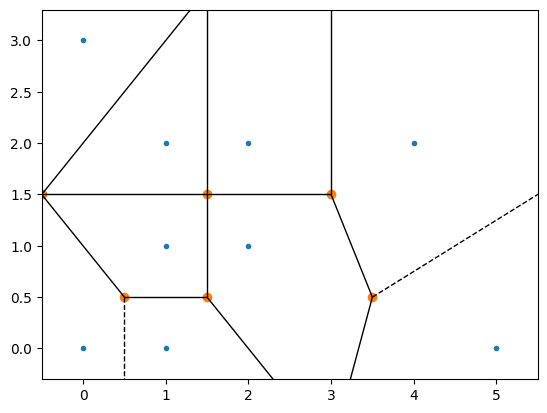

In [57]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

## `.vertices` plots the vertices, labeled orange in the above diagram.

In [58]:
# orange points in above diagram
vor.vertices

array([[ 3. , -1. ],
       [ 3.5,  0.5],
       [ 1.5,  0.5],
       [ 0.5,  0.5],
       [ 3. ,  6.5],
       [ 3. ,  1.5],
       [ 1.5,  3.5],
       [-0.5,  1.5],
       [ 1.5,  1.5]])

In [59]:
# vor.regions

In [60]:
# vor.ridge_vertices

In [61]:
# vor.ridge_points

## Import libraries for KNN decision region plotting

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split

In [63]:
from mlxtend.plotting import plot_decision_regions
import mlxtend
print(mlxtend.__version__)

0.22.0


## We look at the KNN classification with the Iris dataset

[Iris classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

## Load data, and see all details of the dataset with `.DESCR`.

We classify iris with the 0th and 2nd features sepal length and petal length.

In [64]:
# Loading some example data
iris = datasets.load_iris()
# print description of data
print(iris.DESCR)
X = iris.data[:, [0, 2]]
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Visualize the Iris dataset

The example visualization is for feature 0 sepal length, and feature 1 sepal width

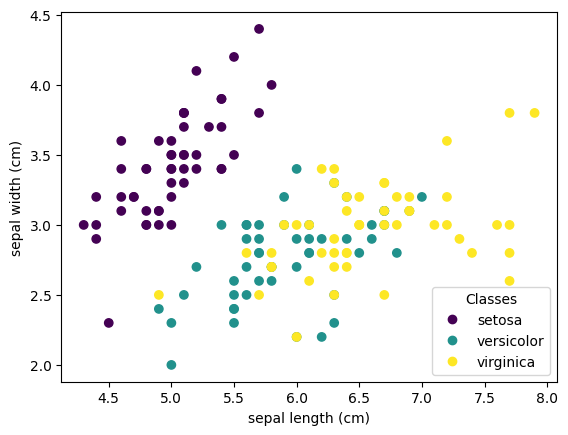

In [65]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

## We try a few metrics for the KNN classifier; the default is metric='minkowski'

`cityblock` metrics.pairwise.manhattan_distances

`cosine` metrics.pairwise.cosine_distances

`euclidean` metrics.pairwise.euclidean_distances

`haversine` metrics.pairwise.haversine_distances

Here `euclinead` is the standard $l_2$ norm, and `cityblock` the $l_1$ norm.

`n_neighbors` is the number of nearest neighbors; when it is equal to 1, we plot a Voronoi diagram.

In [67]:
# Training a classifier
#weights = 'distance','uniform'
knn = neighbors.KNeighborsClassifier(n_neighbors=1, weights='distance',metric='cityblock')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=1, weights='distance')

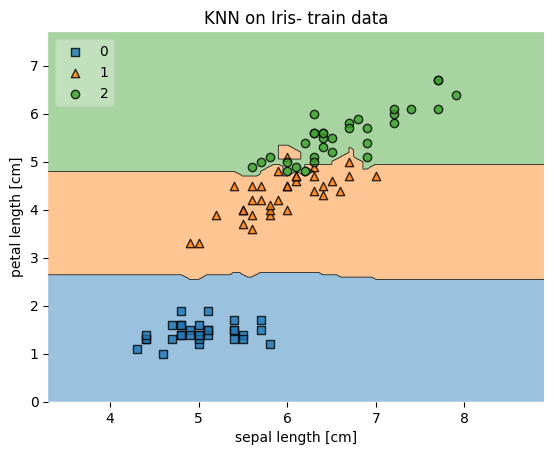

In [68]:
# Plotting decision regions
plot_decision_regions(X_train, y_train, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('KNN on Iris- train data')
plt.show()

In [69]:
y_pred = knn.predict(X_test)

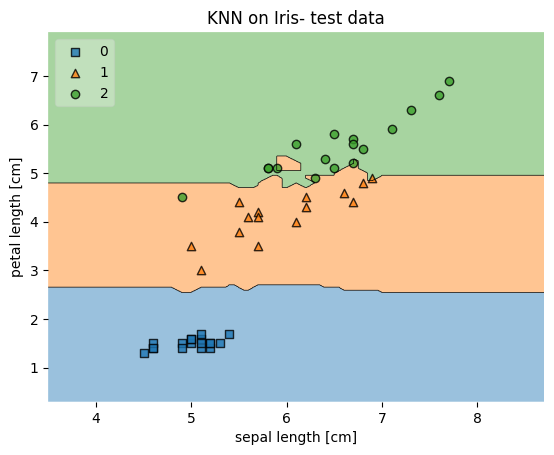

In [70]:
# Plotting decision regions
plot_decision_regions(X_test, y_test, clf=knn, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('KNN on Iris- test data')
plt.show()

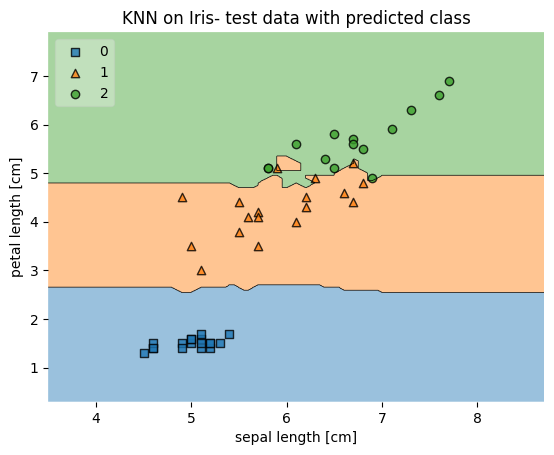

In [71]:
# Plotting decision regions
plot_decision_regions(X_test, y_pred, clf=knn, legend=2)
# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('KNN on Iris- test data with predicted class')
plt.show()

## More details of decision regions drawn by other methods can be found [here](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#references)

## Regression with KNN

We test with a few functions, on $x\in[0,5]$.

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
X = np.linspace(0,5,500)
Xt = X.reshape(-1, 1)
y = np.exp(X)#np.sin(X)

X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.33, random_state=44)

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
y_pred = neigh.predict(X_test)

error = np.max(np.abs(y_pred - y_test))
print(error)

2.2914547642628804


Absolute error is 2.2914547642628804 , Relative error is 0.024726710271244682


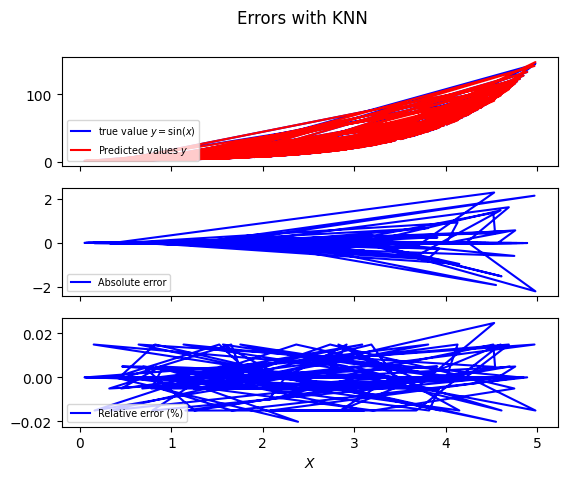

In [90]:
# visualization
print ("Absolute error is", np.max(np.abs(y_test - y_pred)), ", Relative error is", np.max(np.abs((y_test - y_pred)/y_test)))


fig, axs = plt.subplots(3, sharex=True, sharey=False)
fig.suptitle('Errors with KNN')
axs[0].plot(X_test, y_test, 'b-', label='true value $y=\sin(x)$')

axs[0].plot(X_test, y_pred, 'r-', label='Predicted values $y$')
axs[1].plot(X_test, y_test - y_pred, 'b-', label='Absolute error')
axs[2].plot(X_test, (y_test - y_pred)/y_test, 'b-', label='Relative error (%)')
axs[0].legend(loc='lower left', fontsize = 'x-small')
axs[1].legend(loc='lower left', fontsize = 'x-small')
axs[2].legend(loc='lower left', fontsize = 'x-small')
plt.xlabel('$X$', fontsize=10)
plt.show()